In [674]:
import math
import pydicom
import numpy as np
import pandas as pd
from PIL import Image
from utils import display
from scipy import ndimage
import matplotlib.pyplot as plt

In [675]:
dicom_file_path = 'images/DICOMOBJ/BAR2'

# Read the DICOM file
dicom_data = pydicom.dcmread(dicom_file_path)
arr = dicom_data.pixel_array 
h, w = arr.shape
crop = [int(0.36*h), int(0.68*h), int(0.12*w), int(0.89*w)]
arr = dicom_data.pixel_array[crop[0]: crop[1], crop[2]: crop[3]] # crop aspect
h, w = arr.shape
h, w

(399, 949)

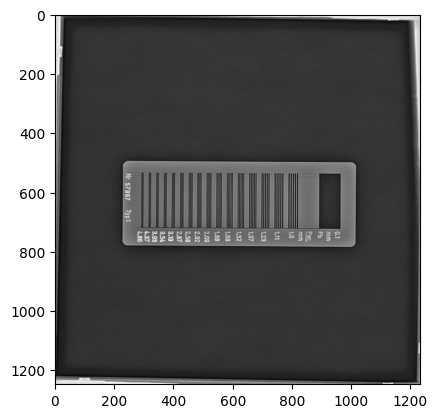

In [676]:
display(dicom_data.pixel_array, True)

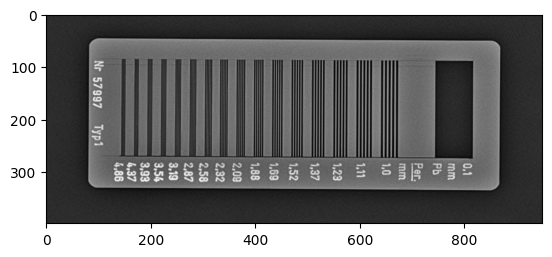

In [677]:
display(arr, True)

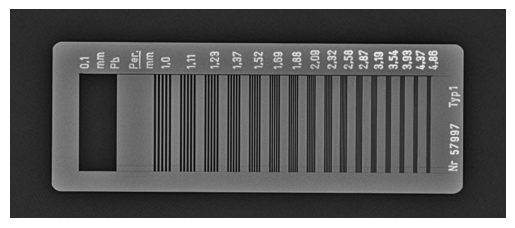

In [678]:
display(ndimage.rotate(arr, 180))

In [679]:
arr = ndimage.rotate(arr, 180)

hp = int(0.28*h)
wp = int(0.03*w)

In [680]:
focus_l = arr[h-2*hp: int(h*.95), wp*9: wp*11]
nrows, ncols = focus_l.shape
nrows, ncols

(202, 56)

In [681]:
def argdiffs(arr) :
    """ 
    find most differents position of pixel value by row
    Return: argdiff in len(rows)
    """
    nrows, ncols = arr.shape
    arg_diffs = []
    for c in range(ncols) :
        max_diff = 0
        argmax_diff = 0
        for r in range(nrows) :
            # find different of past val 
            if r+1 < nrows : # index out of length
                cur_val = arr[r][c]
                next_val = arr[r+1][c]
                diff = abs(int(cur_val) - int(next_val)) # overflow
                if diff > max_diff :
                    max_diff = diff
                    argmax_diff = r
        arg_diffs.append(argmax_diff)
    return arg_diffs

In [682]:
# most common argdiff
arg_diffs = argdiffs(focus_l)
unique_elements, counts = np.unique(arg_diffs, return_counts=True)
most_common_index = np.argmax(counts)
y1 = unique_elements[most_common_index]
y1

171

In [683]:
focus_r = arr[h-2*hp: int(h*.95), w-(wp*11): w-(wp*9)]
nrows, ncols = focus_r.shape
nrows, ncols

(202, 56)

In [684]:
# most common argdiff
arg_diffs = argdiffs(focus_r)
unique_elements, counts = np.unique(arg_diffs, return_counts=True)
most_common_index = np.argmax(counts)
y2 = unique_elements[most_common_index]
y2

173

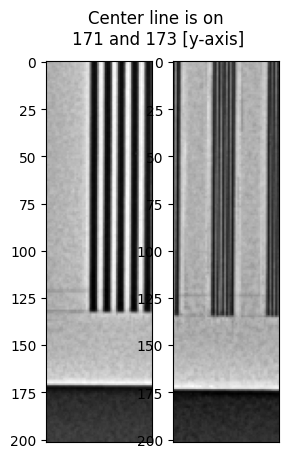

In [685]:
plt.figure(figsize=(3, 5))
plt.subplot(1, 2, 1)
display(focus_l, axis=True)
plt.tick_params(bottom=False, labelbottom=False) # hide x-axis

plt.subplot(1, 2, 2)
display(focus_r, axis=True)
plt.tick_params(bottom=False, labelbottom=False)
plt.suptitle(f"Center line is on \n{y1} and {y2} [y-axis]");

In [686]:
def find_theta(w, y1, y2) :
    """
    find theta from y1, y2
    Return: theta in degree
    """
    a = y2-y1
    theta_r = math.atan(a/w)
    theta_d = math.degrees(theta_r)
    return theta_d

In [687]:
theta = find_theta(w, y1, y2)
theta

0.12074961999434554

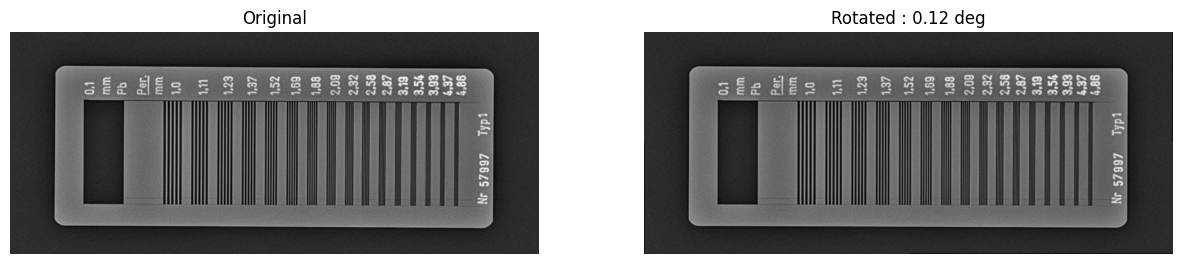

In [688]:
rotate_img = ndimage.rotate(arr, theta, reshape=False, cval=arr.min())

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title("Original")
display(arr)

plt.subplot(1, 2, 2)
plt.title(f"Rotated : {theta:.2f} deg")
display(rotate_img)

In [689]:
h, w = rotate_img.shape
h, w

(399, 949)

In [690]:
hp = int(0.11*h)
wp = int(0.10*w)

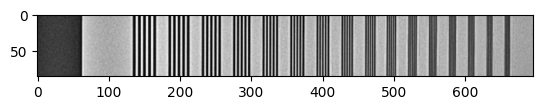

In [691]:
focus = rotate_img[h//2-hp: h//2+hp, int(wp*1.5): w-int(wp*1.2)]
display(focus, True)

In [692]:
# mean by col
oneline = np.mean(focus, axis=0, dtype=np.uint32)
s = np.vstack((oneline, oneline, oneline, oneline, oneline, oneline, oneline, oneline, oneline))
display(s)

In [693]:
oneline[: 20]

array([4920, 4949, 4960, 5005, 4990, 5034, 5085, 5081, 5103, 5141, 5184,
       5202, 5190, 5191, 5233, 5250, 5264, 5258, 5287, 5300], dtype=uint32)

<img src="determined.PNG" width="800px">

In [694]:
diff_vals = []
for idx in range(len(oneline)) :
    if idx+1 < len(oneline) :
        cur_val = oneline[idx]
        next_val = oneline[idx+1]
        diff = abs(int(cur_val) - int(next_val))
        diff_vals.append(diff)

In [695]:
new_ts = []
for val in diff_vals :
    if val < np.mean(diff_vals) : 
        val = 0
    else : 
        val = 1000
    new_ts.append(val)

In [696]:
new_ts[50: 200]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1000,
 1000,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1000,
 1000,
 0,
 0,
 1000,
 1000,
 0,
 1000,
 1000,
 0,
 0,
 1000,
 1000,
 0,
 1000,
 1000,
 0,
 0,
 1000,
 1000,
 0,
 1000,
 1000,
 1000,
 0,
 1000,
 1000,
 0,
 1000,
 1000,
 1000,
 0,
 1000,
 1000,
 1000,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1000,
 1000,
 0,
 0,
 1000,
 1000,
 1000,
 1000,
 1000,
 0,
 1000,
 1000,
 0,
 1000,
 1000,
 0,
 1000]

In [697]:
cut_count = int(len(new_ts)*0.015) # if zero is count more than this add it to position

In [698]:
zero_positions = [0]
is_start = False
is_start_zero = True 
start_zero_pos = None
count = 0
for idx, value in enumerate(new_ts) :
    if idx+1 == len(new_ts) : # forgot last one
        zero_positions.append(start_zero_pos)
        zero_positions.append(idx)
    
    if value == 1000 :
        if count >= cut_count :
            zero_positions.append(start_zero_pos)
            zero_positions.append(idx)
        is_start = True
        count = 0
        is_start_zero = True
    
    if is_start :
        if value == 0 :
            if is_start_zero : 
                start_zero_pos = idx
                is_start_zero = False
            count += 1

    print(idx, value, is_start, count, start_zero_pos)

0 0 False 0 None
1 0 False 0 None
2 0 False 0 None
3 0 False 0 None
4 0 False 0 None
5 0 False 0 None
6 0 False 0 None
7 0 False 0 None
8 0 False 0 None
9 0 False 0 None
10 0 False 0 None
11 0 False 0 None
12 0 False 0 None
13 0 False 0 None
14 0 False 0 None
15 0 False 0 None
16 0 False 0 None
17 0 False 0 None
18 0 False 0 None
19 0 False 0 None
20 0 False 0 None
21 0 False 0 None
22 0 False 0 None
23 0 False 0 None
24 0 False 0 None
25 0 False 0 None
26 0 False 0 None
27 0 False 0 None
28 0 False 0 None
29 0 False 0 None
30 0 False 0 None
31 0 False 0 None
32 0 False 0 None
33 0 False 0 None
34 0 False 0 None
35 0 False 0 None
36 0 False 0 None
37 0 False 0 None
38 0 False 0 None
39 0 False 0 None
40 0 False 0 None
41 0 False 0 None
42 0 False 0 None
43 0 False 0 None
44 0 False 0 None
45 0 False 0 None
46 0 False 0 None
47 0 False 0 None
48 0 False 0 None
49 0 False 0 None
50 0 False 0 None
51 0 False 0 None
52 0 False 0 None
53 0 False 0 None
54 0 False 0 None
55 0 False 0 None
56

In [718]:
trim = int(0.004*len(oneline))
linepairs = [(zero_positions[i]+trim, zero_positions[i + 1]-trim) for i in range(0, len(zero_positions) - 1, 2)]
linepairs

[(2, 62),
 (135, 166),
 (185, 213),
 (232, 257),
 (276, 298),
 (317, 337),
 (356, 374),
 (393, 409),
 (428, 442),
 (461, 474),
 (491, 502),
 (521, 531),
 (551, 559),
 (579, 586),
 (605, 612),
 (632, 638),
 (657, 662)]

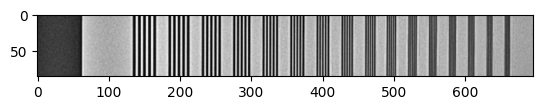

In [700]:
plt.subplot(2, 1, 1)
display(focus, True)

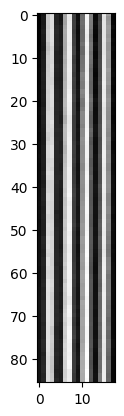

In [701]:
linepair_idx = 5
display(focus[:, linepairs[linepair_idx][0]: linepairs[linepair_idx][1]], True)

In [736]:
min_val0 = np.median(focus[:, linepairs[0][0]: linepairs[0][1]])
max_val0 = np.median(focus[:, linepairs[0][1]: linepairs[1][0]])
max_contrast = max_val0 - min_val0
min_val0, max_val0, max_contrast

(5169.0, 8849.0, 3680.0)

In [702]:
# wpf = int(0.085*focus.shape[1])
# display(focus[:, :wpf], True)

In [703]:
# black = round(np.min(focus[:, (wpf//3)*2:wpf]))
# white = max(round(np.min(focus[:, :wpf//3])), black) # white is white not black : in case black include min value
# white, black

In [704]:
# mean_max_vals0, mean_min_vals0 = round(max(np.mean(focus[:, :wpf//3]), np.mean(focus[:, (wpf//3)*2:wpf]))), round(np.mean(focus[:, (wpf//3)*2:wpf]))
# max_ref = abs(mean_max_vals0 - mean_min_vals0)
# max_ref

In [705]:
# threshold = white
# binary_image = np.where(focus <= threshold, 0, 1)

# plt.figure(figsize=(5, 2))
# plt.subplot(2, 1, 1)
# display(focus, True)

# plt.subplot(2, 1, 2)
# display(binary_image, True)

In [706]:
# # find position to determined line pairs
# linepairs = binary_image[:, wpf*2:]
# display(linepairs, True)

In [707]:
# locate = np.median(linepairs, axis=0)
# locate[:200]

In [708]:
# arg_locates = []
# s1, s2 = None, None
# find_start = True # find first zero to determined area
# for idx, val in enumerate(locate) :
#     if find_start :
#         if val == 0.0 :
#             s1 = idx
#             find_start = False
#             arg_locates.append(s1)
#     else :
#         if val == 1.0 :
#             find_start = True
#             s2 = idx 
#             arg_locates.append(s2)

In [709]:
# npairs = 16
# trim = int(0.004*len(locate))
# pairs = [(arg_locates[i]+trim, arg_locates[i + 1]-trim) for i in range(0, len(arg_locates) - 1, 2)][:npairs]
# pairs

In [710]:
# display(linepairs, True)

In [711]:
# focus = focus[:, wpf*2:]
# display(focus[:, pairs[0][0]: pairs[0][1]])

In [712]:
# display(focus[:, pairs[7][0]: pairs[7][1]])

In [745]:
res = {"Linepair": [0], "Max": [max_val0], "Min": [min_val0], "Contrast": [max_contrast], "Modulation": [100]}
for idx, (s1, s2) in enumerate(linepairs[1:], start=1) :
    linepair = focus[:, s1: s2]
    mean_val_col = np.mean(linepair, axis=0)
    sorted_val = np.sort(mean_val_col) # to seperate max and min vals
    mid_pos = max(min((s2-s1)//2, int(.3*(s2-s1))), 1) # how to select actual value, 1 if 0
    mean_min_vals = round(np.mean(sorted_val[: mid_pos]))
    mean_max_vals = round(np.mean(sorted_val[-mid_pos: ]))
    contrast = mean_max_vals-mean_min_vals
    res["Linepair"].append(idx)
    res["Max"].append(mean_max_vals)
    res["Min"].append(mean_min_vals)
    res["Contrast"].append(contrast)
    res["Modulation"].append(round((mean_max_vals-mean_min_vals)*100/5000, 3))
res = pd.DataFrame(res)

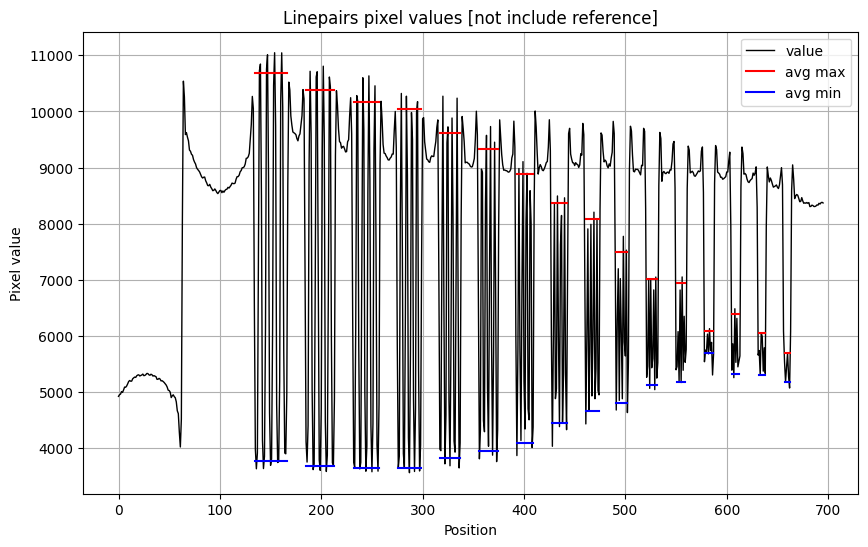

In [747]:
plt.figure(figsize=(10, 6))
plt.plot(np.mean(focus, axis=0, dtype=np.int32), color="black", linewidth=1)
for (s1, s2), (_, max_v, min_v, _, _) in zip(linepairs[1:], res.values[1:]) :
    plt.plot([s1, s2], [max_v, max_v], color="red")
    plt.plot([s1, s2], [min_v, min_v], color="blue")
plt.legend(["value", "avg max", "avg min"])
plt.grid(True)
plt.title("Linepairs pixel values [not include reference]")
plt.ylabel("Pixel value")
plt.xlabel("Position");

<img src="imageJ.PNG" width="700px">

In [748]:
res

,Linepair,Max,Min,Contrast,Modulation
0,0,8849.0,5169.0,3680.0,100.00
1,1,10684.0,3768.0,6916.0,138.32
2,2,10375.0,3684.0,6691.0,133.82
3,3,10164.0,3643.0,6521.0,130.42
4,4,10037.0,3645.0,6392.0,127.84
5,5,9610.0,3816.0,5794.0,115.88
6,6,9328.0,3951.0,5377.0,107.54
7,7,8893.0,4086.0,4807.0,96.14
8,8,8362.0,4439.0,3923.0,78.46
9,9,8088.0,4661.0,3427.0,68.54


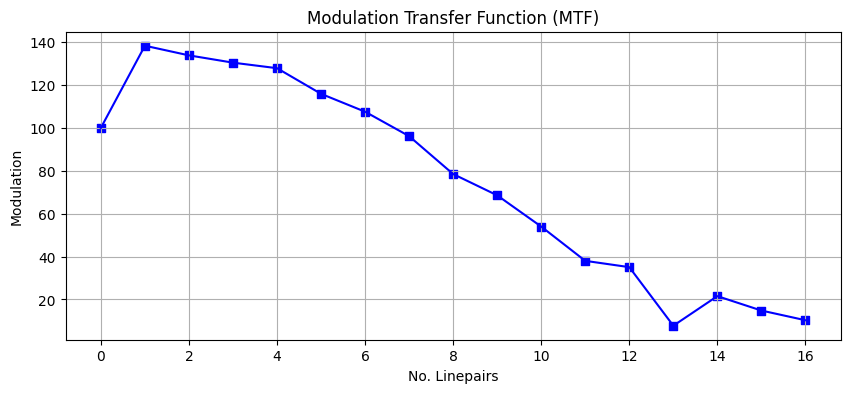

In [716]:
plt.figure(figsize=(10, 4))
plt.title("Modulation Transfer Function (MTF)")
plt.plot(res["Linepair"], res["Modulation"], color="blue")
plt.scatter(res["Linepair"], res["Modulation"], color="blue", marker="s")
plt.grid(True)
plt.ylabel("Modulation")
plt.xlabel("No. Linepairs");